<img style="float: left; margin: 30px 20px 20px 20px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU"  /> 
    
    
### <font color='navy'> Modelos No Lineales para Pronósticos. 

**Nombres:** 
- José Manuel Haces López
- Ana Rosaura Zamarrón Álvarez

**Fecha:** 07 de Marzo de 2022

**Expedientes** :
- 734759
- 736222
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/JManuelHaces/Tarea4_Haces_Zamarron.git

# Tarea 4: Clase 11

## Instrucciones
Ahora vamos a programar otra red neuronal para regresión para el siguiente dataset:

Las muestras contienen 13 atributos de casas en diferentes lugares alrededor del suburbios de Boston a fines de la década de 1970. Los objetivos son los valores medios de las casas en un lugar (en k$).

Los atributos mismos se definen en el [Sitio web de StatLib](http://lib.stat.cmu.edu/datasets/boston).

El diccionario de datos es el siguiente:

        CRIM: Per capita crime rate by town
        ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
        INDUS: Proportion of non-retail business acres per town
        CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        NOX: Nitric oxide concentration (parts per 10 million)
        RM: Average number of rooms per dwelling
        AGE: Proportion of owner-occupied units built prior to 1940
        DIS: Weighted distances to five Boston employment centers
        RAD: Index of accessibility to radial highways
        TAX: Full-value property tax rate per $10,000
        PTRATIO: Pupil-teacher ratio by town
        B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
        LSTAT: Percentage of lower status of the population
        MEDV: Median value of owner-occupied homes in $1000s
    
## Objetivos:
1. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.
2. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

**Nota**: Para poder saber cuales variables incluir en el modelo y cuales rechazar una opción es analizar la correlación de pearson y la otra usando pruebas estadísiticas con las siguientes paqueterías
```
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
```
> Luego del paso 3, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.


## Soluciones:

In [1]:
# Librerías
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

### 0. Carga de Datos

In [2]:
# Cargar los datos de entrenamiento y prueba
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()

# Tamaños de los conjuntos de datos
print('DATOS DE ENTRENAMIENTO:')
print(f'\t- Tamaño datos de Entrenamiento: {X_train.shape}')
print(f'\t- Tamaño etiquetas de Entrenamiento: {y_train.shape}\n')

print('DATOS DE TESTEO:')
print(f'\t- Tamaño datos de Testeo: {X_test.shape}')
print(f'\t- Tamaño etiquetas de Testeo: {y_test.shape}')

DATOS DE ENTRENAMIENTO:
	- Tamaño datos de Entrenamiento: (404, 13)
	- Tamaño etiquetas de Entrenamiento: (404,)

DATOS DE TESTEO:
	- Tamaño datos de Testeo: (102, 13)
	- Tamaño etiquetas de Testeo: (102,)


In [3]:
# Analizar la data completa
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
           'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [4]:
# Dividiedo en train y test
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['MEDV']), data['MEDV'], test_size=0.2)

# Viendo las dimensiones
print(f'X_train = {X_train.shape}')
print(f'y_train = {y_train.shape}\n')
print(f'X_test = {X_test.shape}')
print(f'y_test = {y_test.shape}')

X_train = (404, 13)
y_train = (404,)

X_test = (102, 13)
y_test = (102,)


## Código de solución estudiante 1

### 1. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.[

In [5]:
# Definir la arquitectura de la red neuronal
model1 = keras.Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model1.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Entrenar el modelo
model1_fit = model1.fit(
    X_train, # Todas las variables
    y_train,
    validation_split=0.15,
    epochs=250,
    batch_size=4,
    verbose=0
)

4/4 [==============================] - 0s 3ms/step - loss: 3.2366 - mae: 3.2366
Error cuadrático medio en el conjunto de prueba: 3.2366020679473877
Error absoluto medio en el conjunto de prueba: 3.2366020679473877


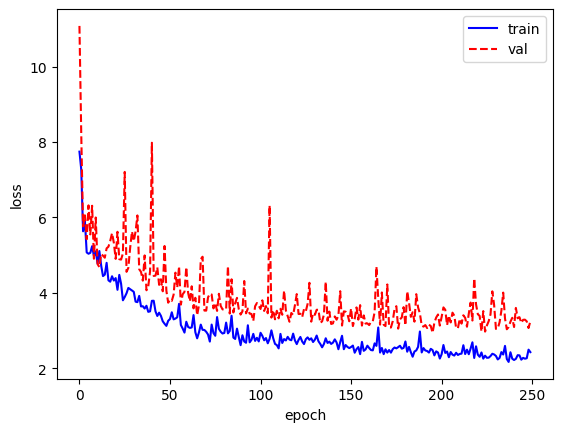

In [6]:
# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model1.evaluate(X_test, y_test)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model1_fit.history['loss'], 'b', label='train')
plt.plot(model1_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

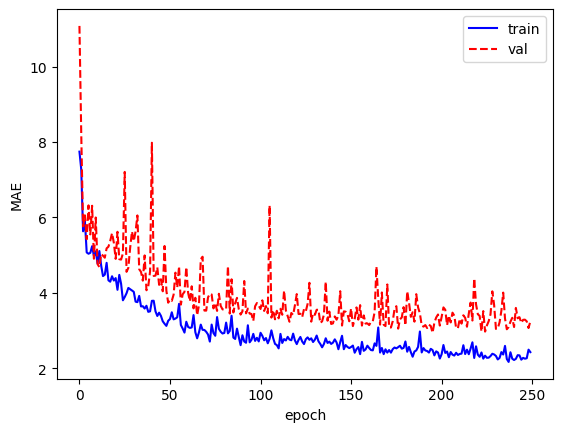

In [7]:
# Graficar métricas de error
plt.plot(model1_fit.history['mae'], 'b', label='train')
plt.plot(model1_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend()

4/4 [==============================] - 0s 8ms/step


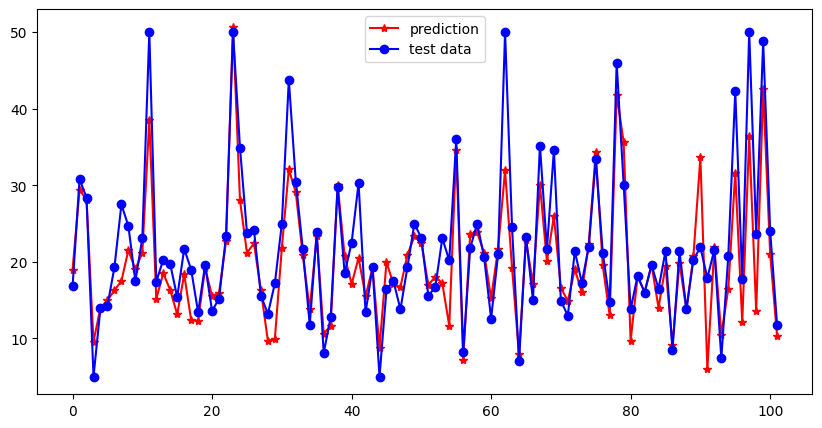

In [8]:
# Realizamos una primera predicción
predicted = model1.predict(X_test)

plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(np.array(y_test), 'bo-', label='test data')
plt.legend()
plt.show()

### 2. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

In [9]:
# Modelo de selección
model_select = SelectKBest(score_func=f_regression, k=7)
# Entrenando el modelo
results = model_select.fit(X_train, y_train)

# Obteniendo los nombres de las variables
vars_k_best = list(results.get_feature_names_out(input_features=None))
vars_k_best

['INDUS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']

In [10]:
# Definir la arquitectura de la red neuronal
model2 = keras.Sequential([
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilar el modelo
model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
model2_fit = model2.fit(
    X_train[vars_k_best], # Tomando las variables seleccionadas por k_best
    y_train,
    validation_split=0.15,
    epochs=250,
    batch_size=4,
    verbose=0
)

4/4 [==============================] - 0s 5ms/step - loss: 24.8249 - mae: 3.6347
Error cuadrático medio en el conjunto de prueba: 24.8249454498291
Error absoluto medio en el conjunto de prueba: 3.634662389755249


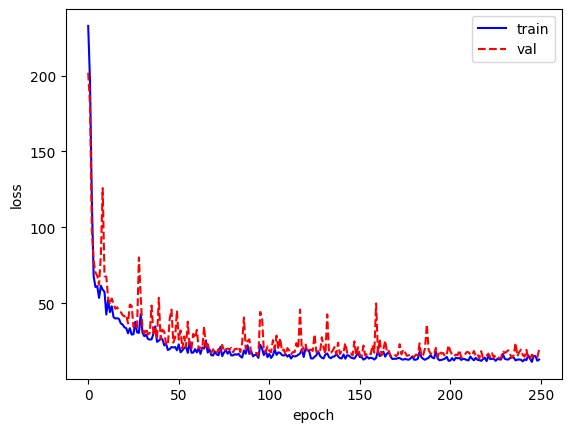

In [11]:
# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model2.evaluate(X_test[vars_k_best], y_test)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model2_fit.history['loss'], 'b', label='train')
plt.plot(model2_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

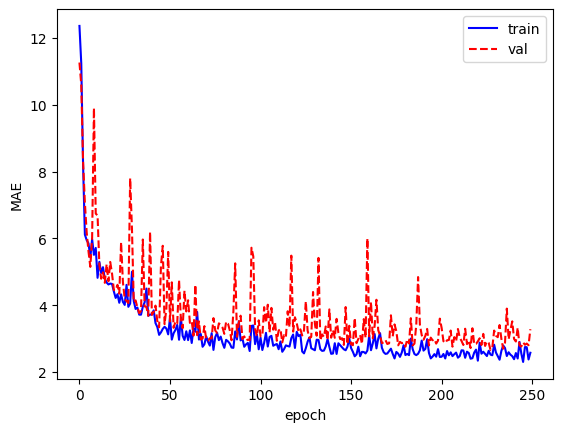

In [12]:
# Graficar métricas de error
plt.plot(model2_fit.history['mae'], 'b', label='train')
plt.plot(model2_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend()

4/4 [==============================] - 0s 8ms/step


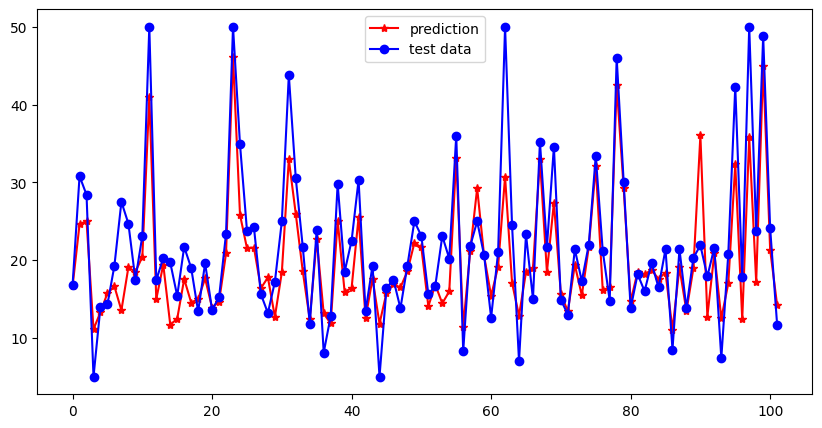

In [13]:
# Realizamos una primera predicción
predicted = model2.predict(X_test[vars_k_best])

plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(np.array(y_test), 'bo-', label='test data')
plt.legend()
plt.show()

### 3. Luego del paso 2, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.

In [14]:
# Modelo a usar
model3 = keras.Sequential([
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(40, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Comiplando el Modelo
model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Creandoe l objeto EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20)

model3_fit = model3.fit(
    X_train[vars_k_best],
    y_train,
    validation_split=0.15,
    epochs=500,
    batch_size=4,
    callbacks=[early_stopping],
    verbose=0
)

4/4 [==============================] - 0s 0s/step - loss: 53.8607 - mae: 5.8402
Error cuadrático medio en el conjunto de prueba: 53.8607292175293
Error absoluto medio en el conjunto de prueba: 5.840214252471924


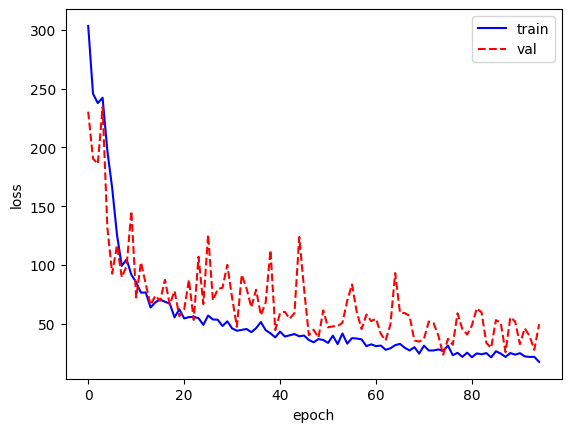

In [15]:
# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model3.evaluate(X_test[vars_k_best], y_test)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model3_fit.history['loss'], 'b', label='train')
plt.plot(model3_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

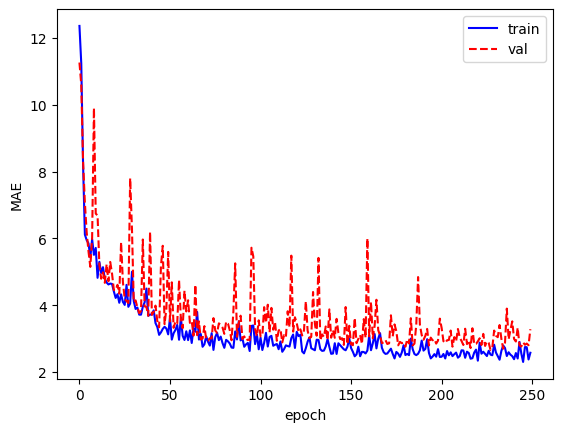

In [16]:
# Graficar métricas de error
plt.plot(model2_fit.history['mae'], 'b', label='train')
plt.plot(model2_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend()

4/4 [==============================] - 0s 2ms/step


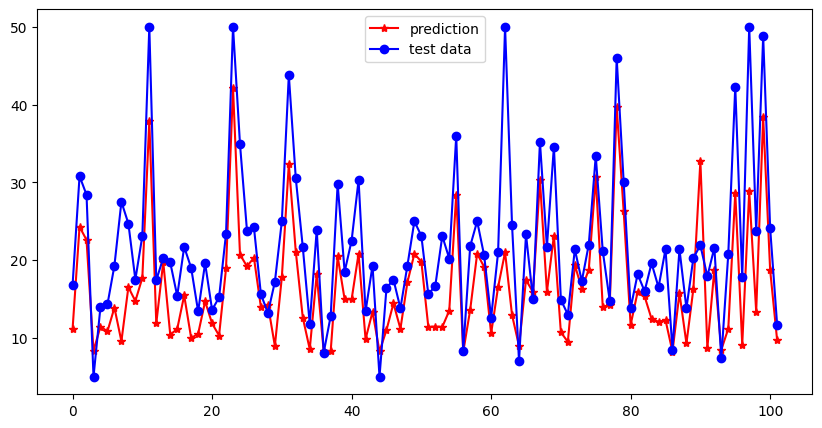

In [17]:
# Realizamos una primera predicción
predicted = model3.predict(X_test[vars_k_best])

plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(np.array(y_test), 'bo-', label='test data')
plt.legend()
plt.show()

Código de solución estudiante 2

In [18]:
# Código de solución estudiante 2

